# Problem Statement:
You are the data scientist at a telecom company named “Neo” whose customers
are churning out to its competitors. You have to analyze the data of your
company and find insights and stop your customers from churning out to other
telecom companies.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
df= pd.read_csv('customer_churn.csv')

In [5]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
df.info


<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.isnull().sum().sum()


0

In [9]:
df.duplicated().sum()

0

 Extract the 5th column and store it in ‘customer_5’

In [10]:
customer_5 = data.iloc[:, 4] 
print("5th Column Extracted:\n", customer_5)

5th Column Extracted:
 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object


Extract the 15th column and store it in ‘customer_15’

In [11]:
customer_15 = data.iloc[:, 14] 
print("\n15th Column Extracted:\n", customer_15)


15th Column Extracted:
 0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object


Extract all the male senior citizens whose payment method is electronic check


In [14]:
senior_male_electronic = data[
    (data['gender'] == 'Male') &
    (data['SeniorCitizen'] == 1) &
    (data['PaymentMethod'] == 'Electronic check')
]
print("\nMale Senior Citizens with Electronic Check:\n", senior_male_electronic)


Male Senior Citizens with Electronic Check:
       customerID gender  SeniorCitizen Partner Dependents  tenure  \
20    8779-QRDMV   Male              1      No         No       1   
55    1658-BYGOY   Male              1      No         No      18   
57    5067-XJQFU   Male              1     Yes        Yes      66   
78    0191-ZHSKZ   Male              1      No         No      30   
91    2424-WVHPL   Male              1      No         No       1   
...          ...    ...            ...     ...        ...     ...   
6837  6229-LSCKB   Male              1      No         No       6   
6894  1400-MMYXY   Male              1     Yes         No       3   
6914  7142-HVGBG   Male              1     Yes         No      43   
6967  8739-WWKDU   Male              1      No         No      25   
7032  6894-LFHLY   Male              1      No         No       1   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
20             No  No phone service             DS

Extract all those customers whose tenure is greater than 70 months or
their monthly charges is more than $100 and store the result in
‘customer_total_tenure’

In [16]:
customer_total_tenure = data[
    (data['tenure'] > 70) | (data['MonthlyCharges'] > 100)
]
print("\nCustomers with Tenure > 70 months or Monthly Charges > $100:\n", customer_total_tenure)


Customers with Tenure > 70 months or Monthly Charges > $100:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
8     7892-POOKP  Female              0     Yes         No      28   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    Male              0      No         No      49   
14    5129-JLPIS    Male              0      No         No      25   
15    3655-SNQYZ  Female              0     Yes        Yes      69   
...          ...     ...            ...     ...        ...     ...   
7023  1035-IPQPU  Female              1     Yes         No      63   
7034  0639-TSIQW  Female              0      No         No      67   
7037  2569-WGERO  Female              0      No         No      72   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
8             Yes  


● Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’

In [17]:

two_mail_yes = data[
    (data['Contract'] == 'Two year') & 
    (data['PaymentMethod'] == 'Mailed check') & 
    (data['Churn'] == 'Yes')
]

print("\nCustomers with Two Year Contract, Mailed Check Payment, and Churn = Yes:\n", two_mail_yes)



Customers with Two Year Contract, Mailed Check Payment, and Churn = Yes:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
268   6323-AYBRX    Male              0      No         No      59   
5947  7951-QKZPL  Female              0     Yes        Yes      33   
6680  9412-ARGBX  Female              0      No        Yes      48   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
268           Yes            No              No  No internet service  ...   
5947          Yes           Yes              No  No internet service  ...   
6680          Yes            No     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
268   No internet service  No internet service  No internet service   
5947  No internet service  No internet service  No internet service   
6680                  Yes                  Yes                  Yes   

          StreamingMovies  Contract PaperlessBilli


● Extract 333 random records from the customer_churndataframe and store
the result in 'customer_333'

In [18]:

customer_333 = data.sample(n=333, random_state=42)
print("\n333 Random Records Extracted:\n", customer_333)



333 Random Records Extracted:
       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
185   1024-GUALD  Female              0     Yes         No       1   
2715  0484-JPBRU    Male              0      No         No      41   
3825  3620-EHIMZ  Female              0     Yes        Yes      52   
1807  6910-HADCM  Female              0      No         No       1   
132   8587-XYZSF    Male              0      No         No      67   
...          ...     ...            ...     ...        ...     ...   
1451  6890-PFRQX    Male              0      No         No      18   
3601  1552-CZCLL  Female              0     Yes        Yes      55   
2149  2014-MKGMH  Female              0      No         No      46   
5141  0303-WMMRN    Male              0      No         No       5   
2087  3806-DXQOM  Female              0      No         No       4   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
185            No  No phone service           

In [19]:

churn_counts = data['Churn'].value_counts()
print("\nCount of Different Levels in 'Churn' Column:\n", churn_counts)



Count of Different Levels in 'Churn' Column:
 No     5174
Yes    1869
Name: Churn, dtype: int64


# 2. Data Visualization:
● Build a bar-plot for the ’InternetService’ column:
a. Set x-axis label to ‘Categories of Internet Service’
b. Set y-axis label to ‘Count of Categories’
c. Set the title of plot to be ‘Distribution of Internet Service’
d. Set the color of the bars to be ‘orange’
● Build a histogram for the ‘tenure’ column:
a. Set the number of bins to be 30
b. Set the color of the bins to be ‘green’
c. Assign the title ‘Distribution of tenure’
● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
a. Assign the points a color of ‘brown’
b. Set the x-axis label to ‘Tenure of customer’
c. Set the y-axis label to ‘Monthly Charges of customer’
d. Set the title to ‘Tenure vs Monthly Charges’
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &
f. ‘Contract’ on the x-axis.


# Build a bar-plot for the ’InternetService’ column:
a. Set x-axis label to ‘Categories of Internet Service’
b. Set y-axis label to ‘Count of Categories’
c. Set the title of plot to be ‘Distribution of Internet Service’
d. Set the color of the bars to be ‘orange’

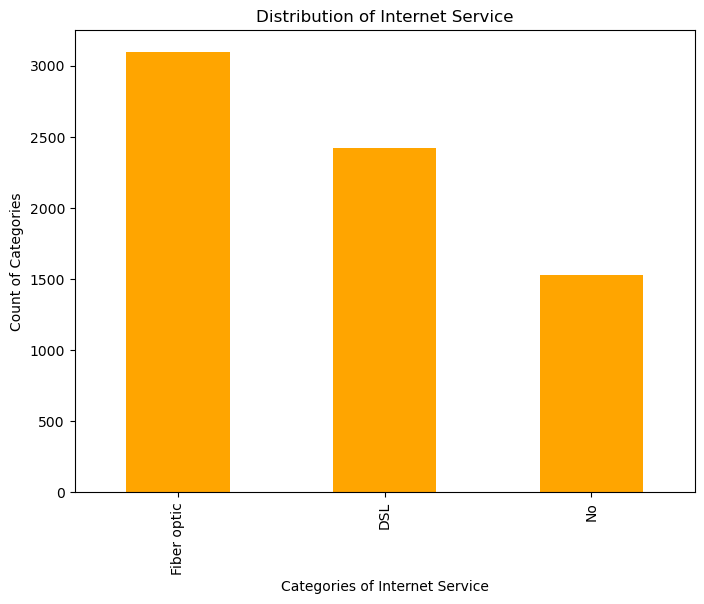

In [20]:
import matplotlib.pyplot as plt

# Count the occurrences of each category in 'InternetService'
internet_service_counts = data['InternetService'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
internet_service_counts.plot(kind='bar', color='orange')

# Set labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Show the plot
plt.show()


# ● Build a histogram for the ‘tenure’ column:
a. Set the number of bins to be 30
b. Set the color of the bins to be ‘green’
c. Assign the title ‘Distribution of tenure’

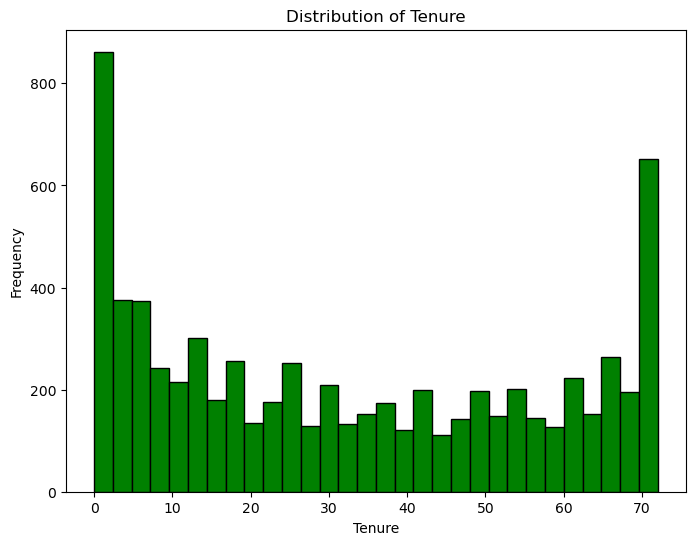

In [21]:
import matplotlib.pyplot as plt

# Plot the histogram for the 'tenure' column
plt.figure(figsize=(8, 6))
plt.hist(data['tenure'], bins=30, color='green', edgecolor='black')  # edgecolor for clear bin edges

# Set labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Tenure')

# Show the plot
plt.show()


# ● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
a. Assign the points a color of ‘brown’
b. Set the x-axis label to ‘Tenure of customer’
c. Set the y-axis label to ‘Monthly Charges of customer’
d. Set the title to ‘Tenure vs Monthly Charges’
e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
y-axis &
f. ‘Contract’ on the x-axis.


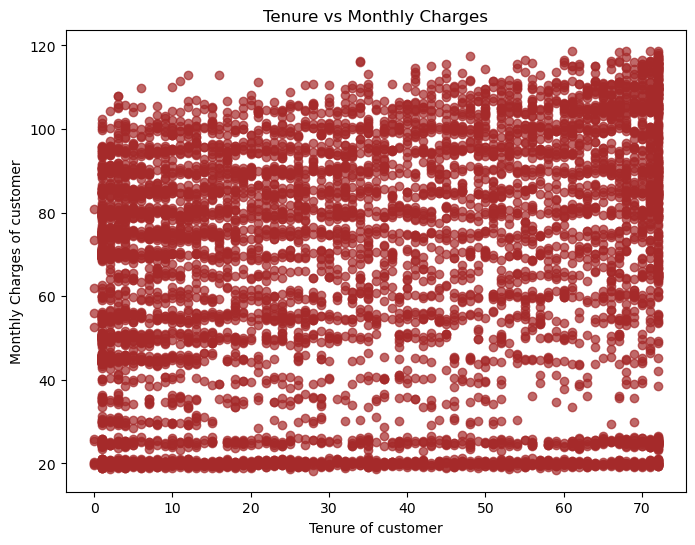

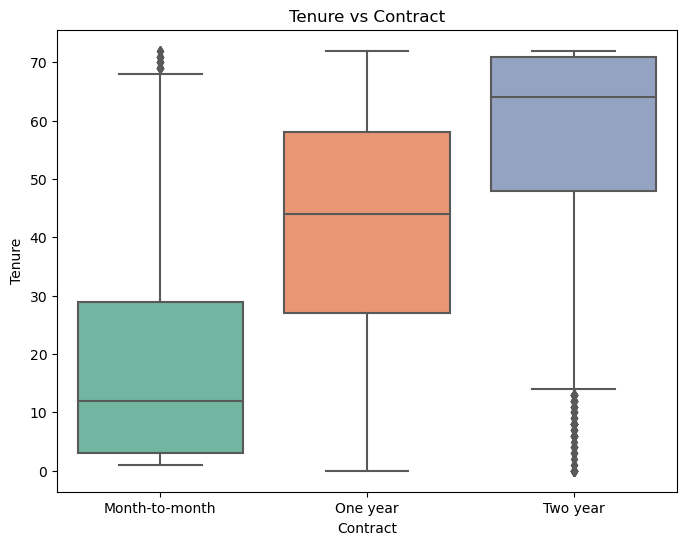

In [22]:
import seaborn as sns
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['tenure'], data['MonthlyCharges'], color='brown', alpha=0.7)

# Set labels and title
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Contract'], y=data['tenure'], palette='Set2')  # Using a palette for better visuals

# Set labels and title
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')


# Show the plot
plt.show()


# 3. Linear Regression:
● Build a simple linear model where dependent variable is ‘MonthlyCharges’
and independent variable is ‘tenure’:
a. Divide the dataset into train and test sets in 70:30 ratio.
b. Build the model on train set and predict the values on test set
c. After predicting the values, find the root mean square error
d. Find out the error in prediction & store the result in ‘error’
e. Find the root mean square error

In [23]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Divide the dataset into train and test sets (70:30 split)
X = data[['tenure']]  # Independent variable
y = data['MonthlyCharges']  # Dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model

# Predict the values on the test set
y_pred = model.predict(X_test)

# Calculate the root mean square error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Calculate the error in prediction and store in 'error'
error = y_test - y_pred
print("\nError in Predictions:\n", error)


Root Mean Square Error (RMSE): 29.07936015646814

Error in Predictions:
 185    -30.306590
2715   -42.185209
3825   -51.475579
1807    21.243410
132    -24.898812
          ...    
5522    15.043410
6377   -10.456590
5500   -12.791303
2392    29.737316
6705   -10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


In [29]:


# Convert 'Churn' to binary (0, 1) if it is categorical
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Independent and dependent variables
X_simple = data[['MonthlyCharges']]  # Independent variable
y_simple = data['Churn']  # Dependent variable

# Split the dataset into train (65%) and test (35%) sets
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.35, random_state=42
)

# Build the logistic regression model
model_simple = LogisticRegression()
model_simple.fit(X_train_simple, y_train_simple)

# Predict on the test set
y_pred_simple = model_simple.predict(X_test_simple)

# Confusion matrix and accuracy score
conf_matrix_simple = confusion_matrix(y_test_simple, y_pred_simple)
accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)

print("Confusion Matrix (Simple Logistic Regression):\n", conf_matrix_simple)
print("\nAccuracy Score (Simple Logistic Regression):", accuracy_simple)

# Independent and dependent variables
X_multiple = data[['tenure', 'MonthlyCharges']]  # Independent variables
y_multiple = data['Churn']  # Dependent variable

# Split the dataset into train (80%) and test (20%) sets
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y_multiple, test_size=0.2, random_state=42
)

# Build the logistic regression model
model_multiple = LogisticRegression()
model_multiple.fit(X_train_multiple, y_train_multiple)

# Predict on the test set
y_pred_multiple = model_multiple.predict(X_test_multiple)

# Confusion matrix and accuracy score
conf_matrix_multiple = confusion_matrix(y_test_multiple, y_pred_multiple)
accuracy_multiple = accuracy_score(y_test_multiple, y_pred_multiple)

print("Confusion Matrix (Multiple Logistic Regression):\n", conf_matrix_multiple)
print("\nAccuracy Score (Multiple Logistic Regression):", accuracy_multiple)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [30]:


# Convert 'Churn' to binary (0, 1) if it is categorical
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Independent and dependent variables
X = data[['tenure']]  # Independent variable
y = data['Churn']  # Dependent variable

# Split the dataset into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix and calculate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix (Decision Tree):\n", conf_matrix)
print("\nAccuracy Score (Decision Tree):", accuracy)


Confusion Matrix (Decision Tree):
 [[1409]]

Accuracy Score (Decision Tree): 1.0


In [32]:


# Convert 'Churn' to binary (0, 1) if it is categorical
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Independent and dependent variables
X = data[['tenure', 'MonthlyCharges']]  # Independent variables
y = data['Churn']  # Dependent variable

# Split the dataset into train (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the random forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Build the confusion matrix and calculate the accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix (Random Forest):\n", conf_matrix)
print("\nAccuracy Score (Random Forest):", accuracy)


Confusion Matrix (Random Forest):
 [[2113]]

Accuracy Score (Random Forest): 1.0
